# Problem Set 1

### Before You Start

For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.

Note: you do not have to use notebooks to solve this PS.  However, you have to submit
* your code
* your results
* your explanations
whatever means you use to solve this assignment.

It is all fine to discuss the problems and way how to solve these with
your classmates and instructors.  However, the solutions must be your
own.  Don't copy-paste each other solutions!

## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

Your task is to analyze the nycflights13 data (in the R package of the
                                               same name).  The
                                               necessary csv
files are provided on canvas (in files/data).  An easy way to get the
explanations is on the the [package page on R documentation](https://www.rdocumentation.org/packages/nycflights13/versions/1.0.0). 

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.

Always comment your results, preferably in a separate markdown cell.


## Preliminaries

You should also make sure the following libraries load correctly.
Below are a few basic data description tasks already done for you. 

In [254]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with arrays and matrices
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt  
from pylab import *
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" %
       sklearn.__version__)
import os
# for certain system-related functions

# Module for plotting
import seaborn as sns
print( "Seaborn version:      %6.6s " %
       sns.__version__)

# Datetime library
import datetime as dt

IPython version:       7.6.1 (need at least 1.0)
Numpy version:        1.16.4 (need at least 1.7.1)
SciPy version:         1.2.1 (need at least 0.12.0)
Pandas version:       0.24.2 (need at least 0.11.0)
Mapltolib version:     3.1.0 (need at least 1.2.1)
Scikit-Learn version: 0.21.2 (need at least 0.13.1)
Seaborn version:       0.9.0 


In [255]:
%matplotlib inline
rcParams['figure.figsize'] = 15,10
sns.set_style('whitegrid')

In [256]:
## Let's read the data and print some summary information
## adjust the path for your file system!
## you can find the path like this:
# path = os.getcwd()
# print(path)
flights_df= pd.read_csv('flights.csv.bz2')
flights_df1 = flights_df
flights_df['date'] = pd.to_datetime(flights_df[['year', 'month', 'day']])
flights_df.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01


In [257]:
## Extract some basic information about the data like number of rows,
## columns, column names, data types
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 18)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute', 'date'],
      dtype='object')
Unnamed: 0             int64
year                   int64
month                  int64
day                    int64
dep_time             float64
dep_delay            float64
arr_time             float64
arr_delay            float64
carrier               object
tailnum               object
flight                 int64
origin                object
dest                  object
air_time             float64
distance               int64
hour                 float64
minute               float64
date          datetime64[ns]
dtype: object


In [258]:
## print the first and last few lines of the data
print("head\n", flights_df.head())
print("tail\n", flights_df.tail())
## Find the number of unique destinations in the data ('dest')
print("destinations:\n", flights_df.dest.unique())

head
    Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0           1  2013      1    1     517.0        2.0     830.0       11.0   
1           2  2013      1    1     533.0        4.0     850.0       20.0   
2           3  2013      1    1     542.0        2.0     923.0       33.0   
3           4  2013      1    1     544.0       -1.0    1004.0      -18.0   
4           5  2013      1    1     554.0       -6.0     812.0      -25.0   

  carrier tailnum  flight origin dest  air_time  distance  hour  minute  \
0      UA  N14228    1545    EWR  IAH     227.0      1400   5.0    17.0   
1      UA  N24211    1714    LGA  IAH     227.0      1416   5.0    33.0   
2      AA  N619AA    1141    JFK  MIA     160.0      1089   5.0    42.0   
3      B6  N804JB     725    JFK  BQN     183.0      1576   5.0    44.0   
4      DL  N668DN     461    LGA  ATL     116.0       762   5.0    54.0   

        date  
0 2013-01-01  
1 2013-01-01  
2 2013-01-01  
3 2013-01-01  
4 201

## Some Tips

* This assignment involves extensive Data frame splitting and
  aggregation. You should look into the details of the methods
  groupby, transform, sum, count, mean etc 
* Many of the tasks in the assignment can be done either through the
  Pandas Data Frame or by converting the data frames to Series. Many
  of the methods in the numpy are applicable to Series only. When
  stuck, try to explore the type of object (Pandas Data Frame or Numpy
  Series) you are dealing with. 

## Question 1

Let’s explore flights from NYC to LA. Use the flights dataset to answer the following questions.

### (a)

How many flights were there from NYC airports to Los Angeles International Airport (LAX) in 2013?

In [259]:
LAX_flights = flights_df[flights_df['dest'] == 'LAX']
LAX_flights.head()

print("The number of flights from NYC airports to Los Angeles (LAX) is: ", len(LAX_flights))

The number of flights from NYC airports to Los Angeles (LAX) is:  16174


### (b)

Which airline ('carrier') has the most flights from NYC to LAX? Which one has the least number of flights? Report the numbers respectively. 

In [260]:
# Check number of flights for each airline
LAX_flights.groupby('carrier').size().sort_values(ascending = False).reset_index(name = 'No of flights')

,carrier,No of flights
0,UA,5823
1,AA,3582
2,VX,2580
3,DL,2501
4,B6,1688


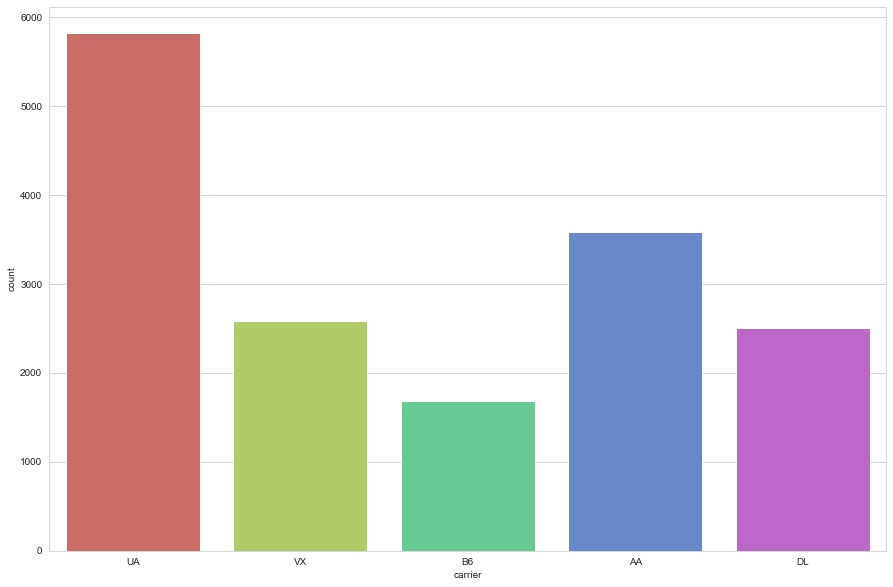

In [261]:
sns.countplot(x = 'carrier', data = LAX_flights, palette = 'hls')

The 'UA' airlines have the most number of flights flights from New York City to Los Angeles.

The 'B6' airlines have the least number of flights from NYC to Los Angeles.

### (c)

How many unique air planes fly from NYC to LAX?
(Hint: use 'tailnum', essentially the license plate of airplane)

In [262]:
# Your code here
print('The unique number of airplanes from NYC to LAX flew were', pd.value_counts(pd.unique(LAX_flights.tailnum)).sum())

The unique number of airplanes from NYC to LAX flew were 991


### (d)

What is the average arrival delay for flights from NYC to LAX?

The average arrival delay for flights from NYC to LAX is 0.547 mins


Text(0.5, 1.0, 'Arrival Delay - Carrier')

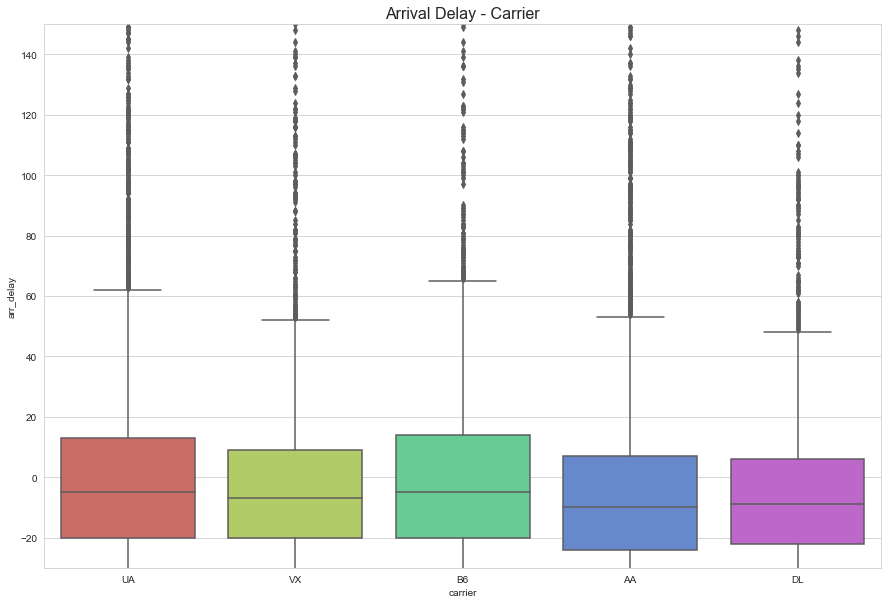

In [263]:
# Your code here
print("The average arrival delay for flights from NYC to LAX is", round(LAX_flights.arr_delay.mean(), 3), 'mins')

sns.boxplot(x = 'carrier', y = 'arr_delay', data = LAX_flights, palette = 'hls')
plt.ylim(-30, 150)
plt.title('Arrival Delay - Carrier', fontsize = 16)

### (e)

What proportion of flights to LAX come from each NYC airport?

In [264]:
# Your code here
LAX_flights.groupby('origin').size().sort_values(ascending = False).reset_index(name = 'No of flights')

,origin,No of flights
0,JFK,11262
1,EWR,4912


Almost 70% of the flights flew from the JFK airport and the other 30% flew from the EWR airport.

## Question 2

Now let's explore the entire NYC flight dataset. Flights are often delayed. Consider the following questions exploring delay patterns.

### (a)

Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [265]:
# Largest Average Departure Delay
dep_delay_group = (flights_df.groupby(['year', 'month', 'day']).dep_delay.mean().
                   sort_values(ascending = False).reset_index(name = 'avg_dep_delay'))

dep_delay_group.head()

,year,month,day,avg_dep_delay
0,2013,3,8,83.536921
1,2013,7,1,56.233825
2,2013,9,2,53.029551
3,2013,7,10,52.860702
4,2013,12,5,52.327990


In [266]:
# Largest Average Arrival Delay
arr_delay_group = (flights_df.groupby(['year', 'month', 'day']).arr_delay.mean().
                   sort_values(ascending = False).reset_index(name = 'avg_arr_delay'))
arr_delay_group.head()

,year,month,day,avg_arr_delay
0,2013,3,8,85.862155
1,2013,6,13,63.753689
2,2013,7,22,62.763403
3,2013,5,23,61.970899
4,2013,7,10,59.626478


In [267]:
print('The date with the largest average arrival and departure delay was March-8-2013')

The date with the largest average arrival and departure delay was March-8-2013


### (b)

What was the worst day and the best day to fly out of NYC in 2013
if you dislike delayed flights?

Note: we ask the largest delay given there was a (positive) delay, we
don't care about flights that were in time or early.

In [268]:
# Your code here
delayed_flights_group = (flights_df[flights_df['dep_delay'] > 0].
                         groupby(['year', 'month', 'day']).dep_delay.mean().
                         sort_values(ascending = False).reset_index(name = 'avg_dep_delay'))

print('The maximum departure delay is', round(delayed_flights_group['avg_dep_delay'][0], 2), 'mins')

print('Worst day to fly out of NYC is', delayed_flights_group['month'][0], '/', 
      delayed_flights_group['day'][0], '/', delayed_flights_group['year'][0], '\n')

print('The minimum departure delay (considering all delays) is', 
      round(dep_delay_group['avg_dep_delay'][364], 2), 'mins')

print('Best day to fly out of NYC is', dep_delay_group['month'][364], '/', 
      dep_delay_group['day'][364], '/', dep_delay_group['year'][364], '\n')

print('The minimum departure delay (considering only positive delays) is', 
      round(delayed_flights_group['avg_dep_delay'][364], 2), 'mins')

print('Best day to fly out of NYC considering the positive delays is', delayed_flights_group['month'][364], '/', 
      delayed_flights_group['day'][364], '/', delayed_flights_group['year'][364])

The maximum departure delay is 102.9 mins
Worst day to fly out of NYC is 3 / 8 / 2013 

The minimum departure delay (considering all delays) is -1.33 mins
Best day to fly out of NYC is 9 / 24 / 2013 

The minimum departure delay (considering only positive delays) is 17.16 mins
Best day to fly out of NYC considering the positive delays is 11 / 9 / 2013


### (c)

On average which airline has the lowest departure delay for
   their NYC flights in 2013 in this dataset? and which one has the
   greatest departure delay?

Note: here we want to include both positive and negative delays (early departures)   

In [269]:
# Your code here
carrier_group = (flights_df.groupby('carrier').dep_delay.mean().
                sort_values(ascending = False).reset_index(name = 'avg_dep_delay'))
carrier_group

,carrier,avg_dep_delay
0,F9,20.215543
1,EV,19.955390
2,YV,18.996330
3,FL,18.726075
4,WN,17.711744
5,9E,16.725769
6,B6,13.022522
7,VX,12.869421
8,OO,12.586207
9,UA,12.106073


The airline with the lowest average departure delay was the 'US' Airlines and the airline with the highest departure delay was 'F9' airlines.

### (d)

Are there any seasonal patterns in departure delays for flights from NYC?

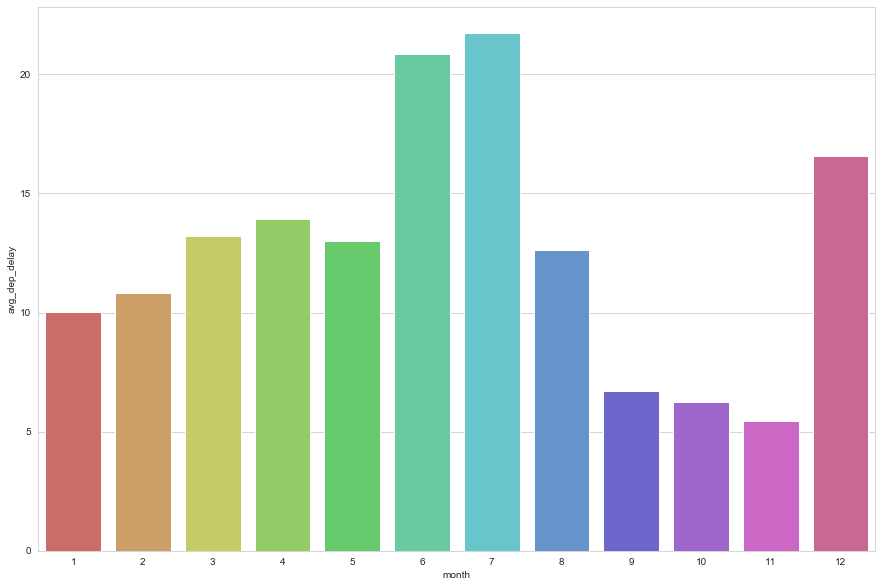

In [270]:
# Your code here
month_delay = (flights_df.groupby('month').dep_delay.mean().
               reset_index(name = 'avg_dep_delay'))

sns.barplot(x = 'month', y = 'avg_dep_delay', data = month_delay,
           palette = 'hls')

From the graph we could see that the June and July month has the largest average departure delays in the whole year and we could see there is a seasonal pattern where after the August month the departure delays reduce drastically and after the start the start of the december month we could see a rise in the departure delays.

### (e)

On average, how do departure delays vary over the course of a day?

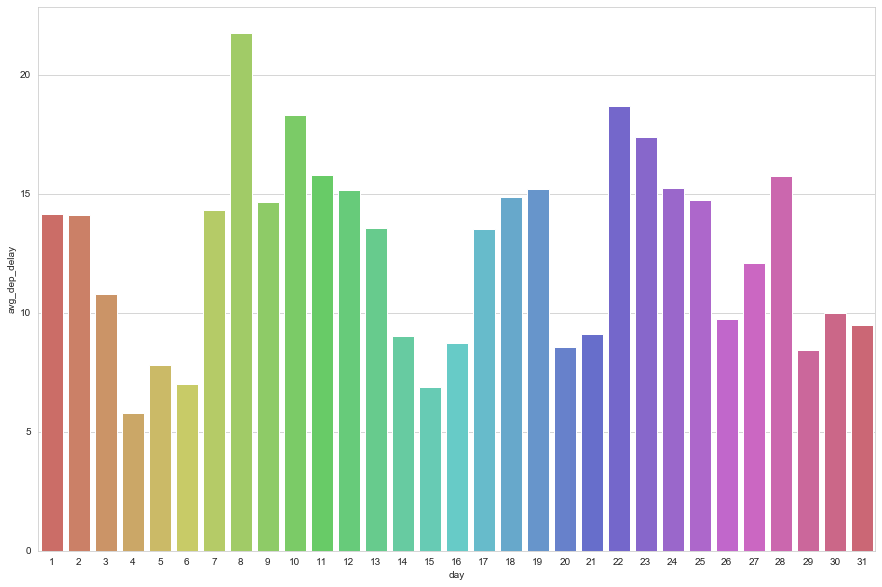

In [271]:
# Your code here
day_delay = (flights_df.groupby('day').dep_delay.mean().
             reset_index(name = 'avg_dep_delay'))
sns.barplot(x = 'day', y = 'avg_dep_delay', data = day_delay, palette = 'hls')

On an average, the departure delays are going up and down in a month and might be showing a pattern where a lot of people might be traveling on weekdays and few people on weekends.

## Question 3

Which flight departing NYC in 2013 flew the slowest?

Note: compute the speed as distance/time.

In [272]:
# Your code here
flights_df['speed'] = (flights_df['distance']/flights_df['air_time'])*60
flights_df[flights_df['speed'] == flights_df['speed'].min()]

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,speed
24098,24099,2013,1,28,1917.0,52.0,2118.0,103.0,US,N755US,1860,LGA,PHL,75.0,96,19.0,17.0,2013-01-28,76.8


The flight from the LGA airport to Philadephia flew at the slowest speed of 76.8 miles per hour.

## Question 4

Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [273]:
# Your code here
features = ['carrier', 'flight', 'dest']

flights_details = (flights_df.groupby(features).
                   size().sort_values(ascending = False).reset_index(name = 'count'))
flights_details[flights_details['count'] == 365]

,carrier,flight,dest,count
0,B6,703,SJU,365
1,B6,359,BUR,365
2,B6,371,FLL,365
3,B6,1783,MCO,365
4,AA,119,LAX,365
5,AA,181,LAX,365
6,VX,413,LAX,365
7,UA,15,HNL,365
8,AA,59,SFO,365
9,DL,2391,TPA,365


The above are the flights that happened everyday in 2013 that flew from NYC to other destinations. 

## Question 5

Develop one research question you can address using the nycflights2013
dataset. Provide two visualizations to support your exploration of
this question. Discuss what you find. 

Note: we'll using matplotlib for plotting in this course, but you can use something else too.


### One question

One of the questions that I could come up with the dataset is to find the punctuality of the carriers and how travel distance affects their punctuality.

#### Number of flights per carrier

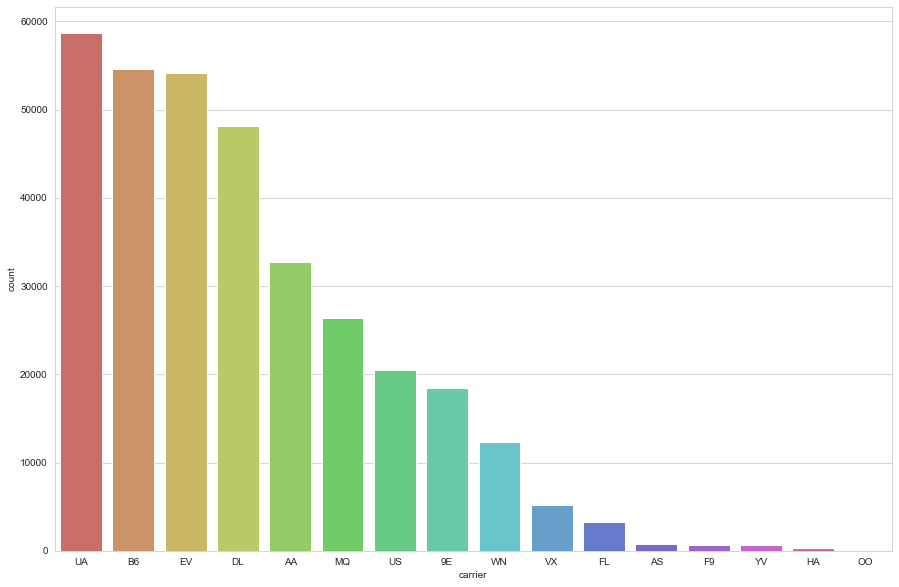

In [274]:
carrier_flights = (flights_df.groupby('carrier').size().
                  sort_values(ascending = False).reset_index(name = 'count'))
sns.barplot(x = 'carrier', y = 'count', data = carrier_flights, palette = 'hls')

In [275]:
airline_punctual = (flights_df[flights_df['arr_delay'] <= 0].groupby('carrier').
                    size().sort_values(ascending = False).reset_index(name = 'count'))
airline_punctual

,carrier,count
0,UA,35560
1,DL,31245
2,B6,30440
3,EV,26624
4,AA,21241
5,MQ,13344
6,US,12482
7,9E,10657
8,WN,6740
9,VX,3370


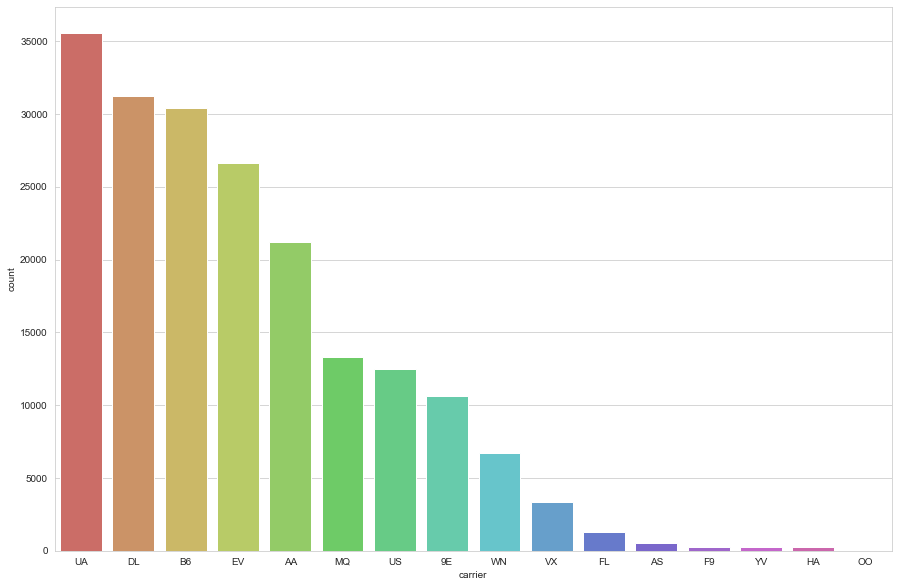

In [276]:
sns.barplot(x = 'carrier', y = 'count', data = airline_punctual, palette = 'hls')

From the data we could see that 'UA' carrier has been the most punctual airline carrier and 'DL' and 'B6' are the second and the third best airline carrier.

Now let us see the departure delays for each airline when they have arrived early.

In [277]:
airline_dep_delay = (flights_df[flights_df['arr_delay'] <= 0].
                         groupby(['carrier']).dep_delay.mean().
                         sort_values().reset_index(name = 'avg_dep_delay'))
airline_dep_delay.head()

,carrier,avg_dep_delay
0,OO,-7.210526
1,YV,-5.045455
2,MQ,-4.984038
3,US,-4.851947
4,AS,-3.611538


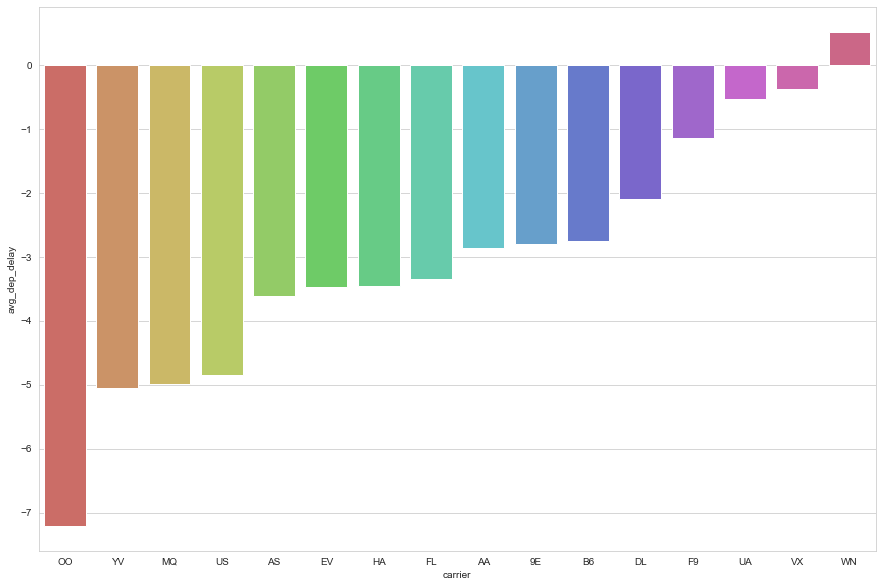

In [278]:
sns.barplot(x = 'carrier', y = 'avg_dep_delay', data = airline_dep_delay, palette = 'hls')

From the charts we could see that the flights that had departed early has arrived early at the destination.

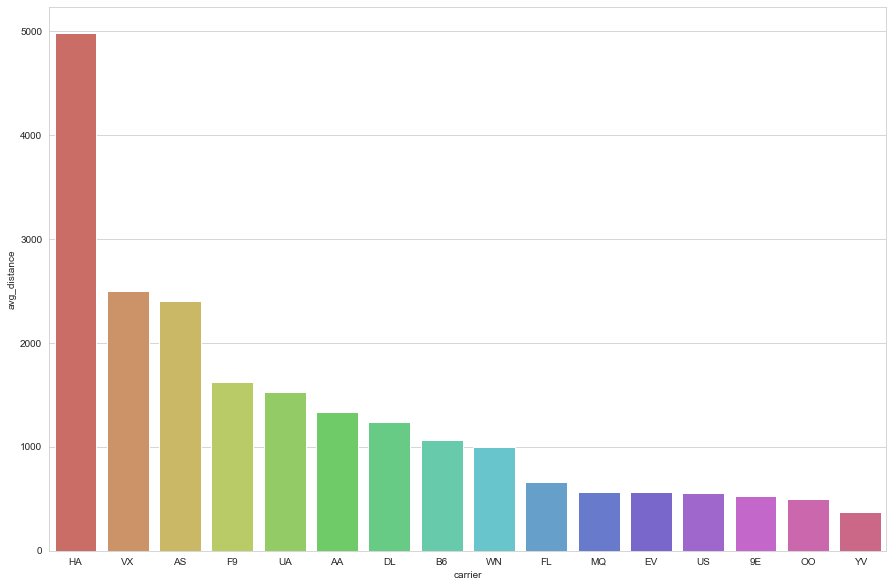

In [279]:
airline_distance = (flights_df.groupby('carrier').distance.mean().
                   sort_values(ascending = False).reset_index(name = 'avg_distance'))
sns.barplot(x = 'carrier', y = 'avg_distance', data = airline_distance, palette = 'hls')

Airlines such as HA, VX, AS do not have a very large number of flights flying from NYC.

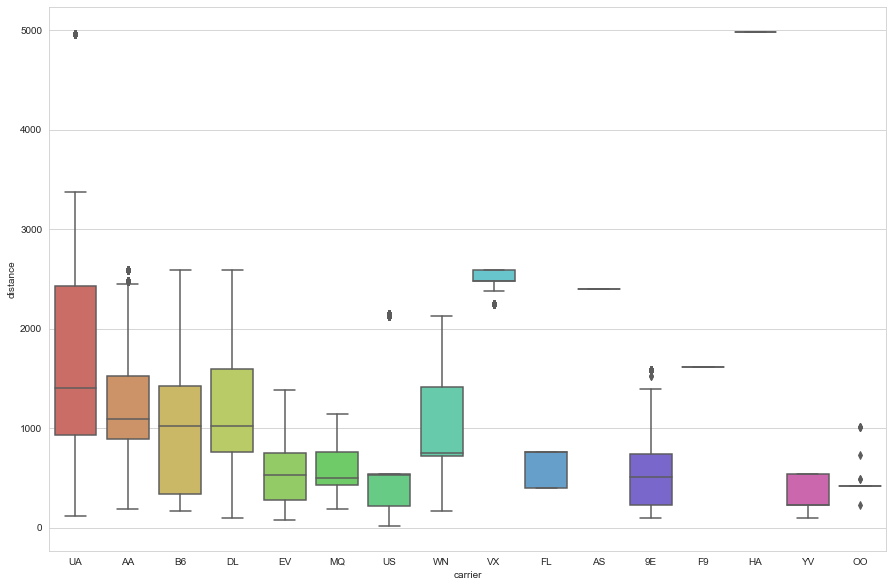

In [280]:
sns.boxplot(x = 'carrier', y = 'distance', data = flights_df, palette = 'hls')

From the above graphs we could see that UA, DL, B6 are the most punctual airlines and the distances that they travel are usually not too long and at the same time not too short and they maintain a middle ground somewhere around 1500 miles in average. From this we can infer that the airlines that travel around the maximum distance of ~1500 miles can maintain a better punctuality than the short distance and long distance traveling airlines.

## Question 6

What weather conditions are associated with flight delays leaving NYC?  Use graphics to explore.

Note: you need to use 'weather.csv' dataset

In [281]:
# Your code here
weather_df = pd.read_csv('weather.csv.bz2')
weather_df.head()
weather_df.dtypes

Unnamed: 0      int64
origin         object
year            int64
month         float64
day           float64
hour          float64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
dtype: object

In [282]:
features = ['temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']

In [283]:
weather_df.columns

Index(['Unnamed: 0', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib'],
      dtype='object')

Text(0.5, 0.98, 'Weather Data')

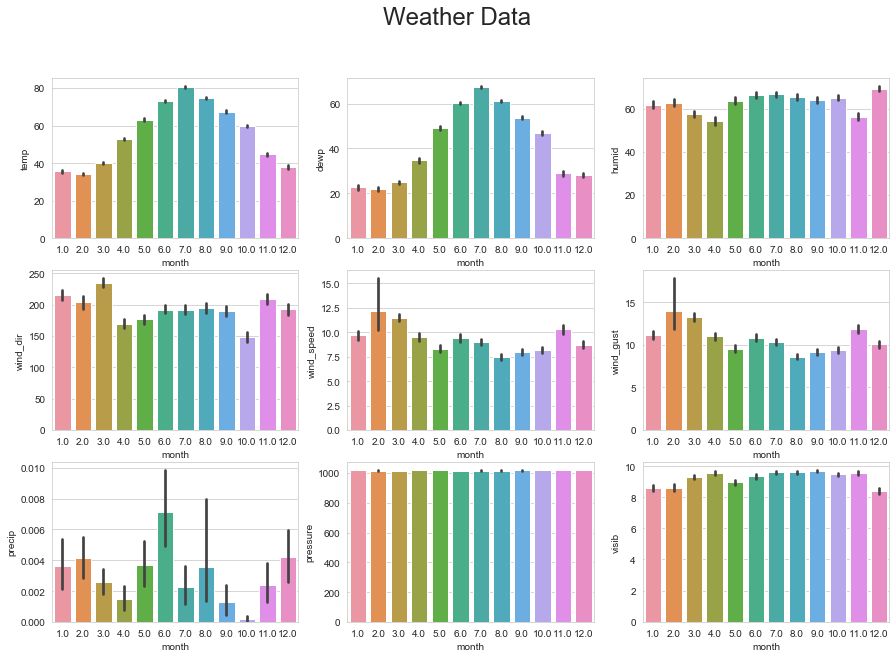

In [284]:
fig, axes = plt.subplots(3,3, squeeze = False)

r = 0
c = 0

for i in range(0, len(weather_df.columns)):
    if weather_df.columns[i] in features:
        sns.barplot(x = 'month', y = weather_df.columns[i], data = weather_df, ax = axes[r][c])
        c = c + 1
        if c == 3:
            c = 0
            r = r + 1
plt.suptitle('Weather Data', fontsize = 24)

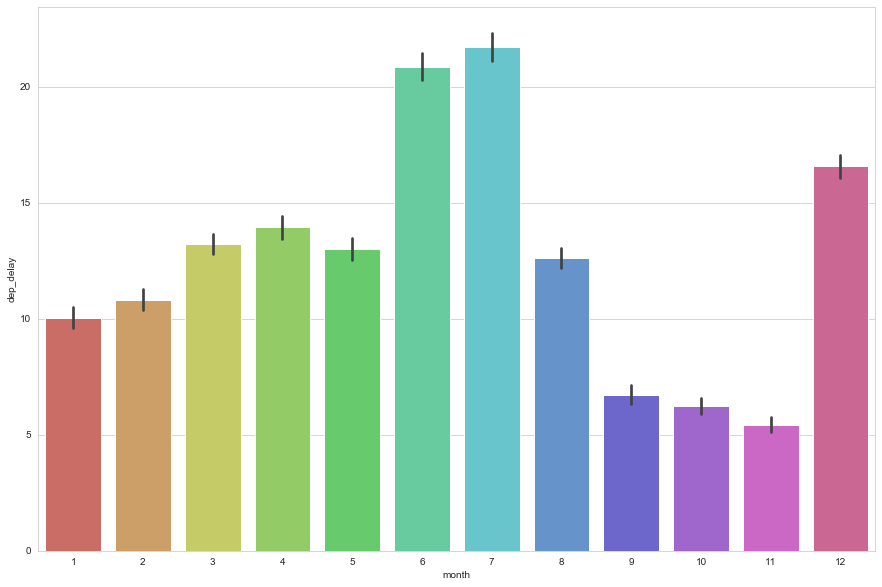

In [285]:
sns.barplot(x = 'month', y = 'dep_delay', data = flights_df, palette = 'hls')

Initially from the departure delay month wise graph indicated that there are a lot of delays during June and July months and from the weather dataset we could see that the temperature raised during June and July months and also the dew point increased during the same time period which is indicating that there is a strong correlation between the departure delay and the temperature and the dew point.

# Grading

* Q1: 1pt each question (5 in total)
* Q2: a) 2pt, b) 3pt, c) 2pt, d) 2pt, e) 1pt
* Q3: 5pt
* Q4: 5pt
* Q5: 15pt
* Q6: 10pt